In [11]:
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [27]:
dataDir=Path('./data')
annFile = Path('./data/result.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()
cats = coco.loadCats(coco.getCatIds())
categories = [cat['name'] for cat in cats]
print("Количество изображений:", len(imgIds))
print(f"\nКоличество категорий: {len(categories)}\n")
print(f"Категории: {categories}")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Количество изображений: 51

Количество категорий: 2

Категории: ['road signs', 'traffic lights']


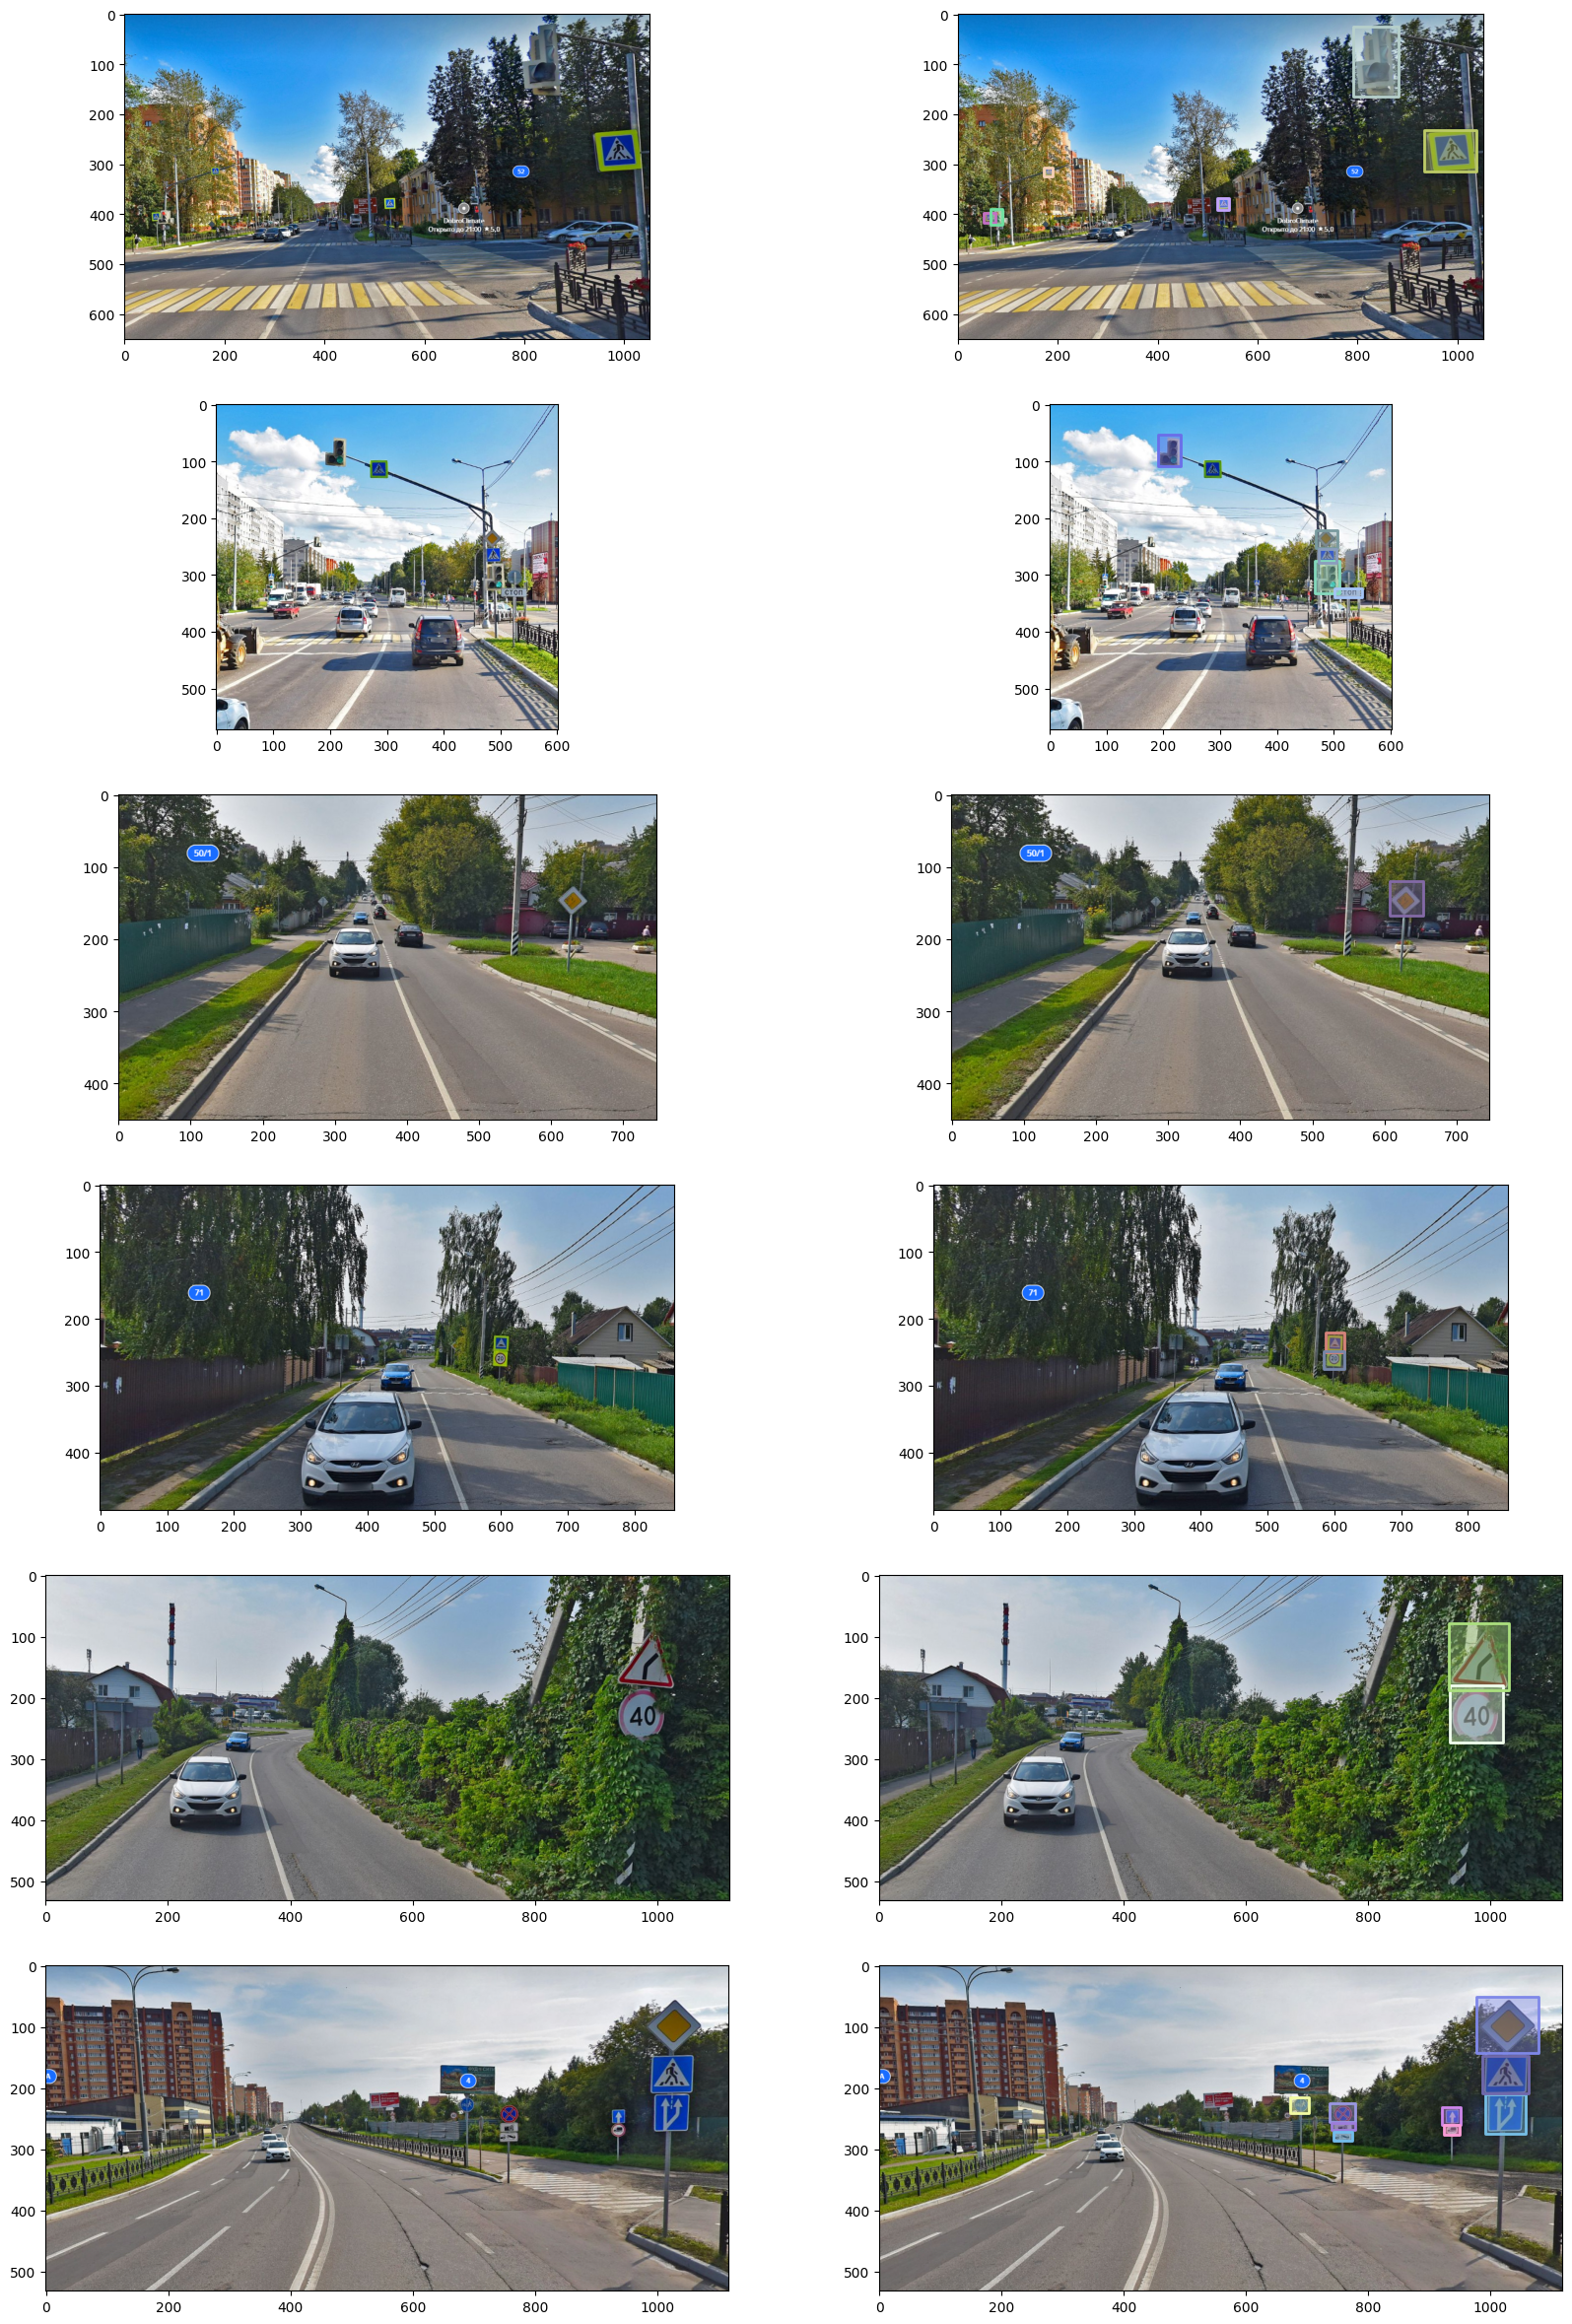

In [28]:
imgs = coco.loadImgs(imgIds[10:16])
_,axs = plt.subplots(len(imgs),2,figsize=(20,5 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)